#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   Valeria Alejandra Ramírez Herrera - A01240716
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 
from sklearn.metrics import fbeta_score, make_scorer

import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import GridSearchCV

from sklearn import tree
import pydotplus 
from IPython.display import Image
from graphviz import Digraph

#**Ejercicio-1.** 

In [2]:
input = 'https://data.ub.uni-muenchen.de/23/2/kredit.asc' #Importación de datos

In [3]:
df = pd.read_table(input, sep=' ')
df.head()

,kredit,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,wohnzeit,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
#Se renombraron las columnas de alemán a inglés
ndf= df.copy()
ndf.rename(columns ={'kredit':'credit_risk','laufkont':'status','laufzeit':'duration',
                     'moral':'credit_history','verw':'purpose','hoehe':'amount',
                     'sparkont':'savings','beszeit':'employment_duration',
                     'rate':'installment_rate','famges':'personal_status_sex',
                     'buerge':'other_debtors','wohnzeit':'present_residence',
                     'verm':'property','alter':'age','weitkred':'other_installment_plans',
                     'wohn':'housing','bishkred':'number_credits','beruf':'job',
                     'pers':'people_liable','telef':'telephone','gastarb':'foreign_worker'},
                     inplace = True)
ndf

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


#**Ejercicio-2.**

In [5]:
X = ndf.iloc[:,1:] #Variables de Entrada
X


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,4,1,21,3,1,1,2,2,1,1
996,1,24,2,0,2303,1,5,4,3,2,1,1,45,3,2,1,3,1,1,1
997,4,21,4,0,12680,5,5,4,3,1,4,4,30,3,3,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1


In [6]:
Y = ndf.iloc[:,0] #Variable de Salida
Y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: credit_risk, Length: 1000, dtype: int64

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.15, random_state = 0)
 

print(Xtrain.shape, ': dimensión de datos de entrada para entrenamiento')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(Ytrain.shape, ': dimensión de variable de salida para entrenamiento')
print(Ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento
(150,) : dimensión de variable de salida para prueba


In [8]:
Ytrain.sum() / Ytrain.shape[0] #Personas a las que se les aprobó el crédito

0.7

#**Ejercicio-3.**

In [9]:
# Variables CATEGORICAL: 'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing'
# Variables ORDINAL/DISCRETIZED QUANTITATIVE: 'employment_duration', 'installment_rate', 'property', 'number_credits', 'job','present_residence'
# Variables QUANTITATIVE: 'duration', 'amount', 'age'
# Variables BINARY: 'telephone', 'foreign_worker', 'credit_risk', 'people_liable'

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [11]:
# Imputación a todas las variables de entrada, diferenciando entre el tipo de cada 
#variable (decide y justifica que tipo de imputación realizas en cada caso).


# Transformaciones a factores QUANTITATIVE de entrada:
numeric_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')), #si hay datos perdidos númericos/continuos se puede aplicar la mediana
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])  #variables numéricas se colocan en rango
numeric_pipeline_nombres = ['duration', 'amount', 'age'] #Transformacion de categóricas númericas/continuas

# Transformaciones a factores CATEGORICAL de entrada:
categ_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  #Datos perdidos categóricos se usa la moda
categ_pipeline_nombres = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex',
                           'other_debtors','other_installment_plans', 'housing']

# Transformaciones a factores DISCRETIZED QUANTITATIVE de entrada:
#discrete_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  #Datos perdidos categóricos se usa la moda
#discrete_pipeline_nombres = ['employment_duration', 'installment_rate', 'property', 
#                             'number_credits', 'job','present_residence']

# Transformaciones a factores BINARY de entrada:
binary_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  #Datos perdidos categóricos se usa la moda
binary_pipeline_nombres = ['telephone', 'foreign_worker', 'people_liable']


# Transformaciones One-Hot encoding a las variables de entrada de tipo categórico y binaria:
cat_binOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))]) #OneHotE convierte factores a columnas/vectores dependiendo la cantidad de categorías
                                                            #Se quita la primera columna
                                                            #Variables categóricas
cat_binOHE_pipeline_nombres = [ 'status', 'credit_history', 'purpose', 'savings', 'personal_status_sex','other_debtors','other_installment_plans', 'housing', #Variables categóricas
                           'telephone', 'foreign_worker', 'people_liable'] #Variables binarias




In [12]:
# Conjuntamos las transformaciones numéricas, discreta y categóricas+binarias que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', numeric_pipeline, numeric_pipeline_nombres), #se juntan las transformaciones numéricas
#                                                        ('disimp', discrete_pipeline, discrete_pipeline_nombres), #se juntan las transformaciones categóricas
                                                        ('catbinohe', cat_binOHE_pipeline, cat_binOHE_pipeline_nombres)],remainder='passthrough') #se juntan las transformaciones OneHotE
                                         #Se juntan las que no sufrieron transformación

In [13]:
#Confirmación de que el set no tiene valores nulos de manera general
#ndf.isnull().values.any() #Se hace verificación si falta algún dato

In [14]:
#Confirmación de que el set no tiene valores nulos por variable
#ndf.isnull().any() #En cuales columnas falta al menos 1 dato

#**Ejercicio-4.**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold

In [16]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(max_iter=3000))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  # RFC - Random Forest:
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')

  return modelos, nombres



In [17]:


def mis_metricas(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
   
     gmean = np.sqrt((vp/(vp+fn))*((vn/(vn+fp))))
  
     recall= vp / (vp+fn)
 
     accuracy = (vp + vn) / (vp + fn + vn + fp)

     precision = vp / (vp + fp)
 
     fscore = (2 * vp) / ((2*vp) + fp + vn)
  
     return accuracy, recall, gmean, precision, fscore

# FUNCION PARA EL GMEAN
def mi_gmean(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
   
     gmean = np.sqrt((vp/(vp+fn))*((vn/(vn+fp))))

     return gmean   
    
# FUNCIÓN PARA ACCURACY

def mi_accuracy(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
  
     accuracy = (vp + vn) / (vp + fn + vn + fp)

     return accuracy

    
# FUNCIÓN PARA RECALL 
def mi_recall(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
   
     recall= vp / (vp+fn)

   
     return recall

# FUNCIÓN PARA PRECISIÓN
def mi_precision(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   

     precision = vp / (vp + fp)
        
     return precision 
    
# FUNCIÓN PARA F1SCORE    
def mi_fscore(yreal, ypred):

     cm = confusion_matrix(yreal, ypred)
     tot = cm.sum()
     vn = 100*cm[0,0] / tot
     fp = 100*cm[0,1] / tot
     fn = 100*cm[1,0] / tot
     vp = 100*cm[1,1] / tot   
     fscore = (2 * vp) / ((2*vp) + fp + vn)
  
     return fscore    

In [18]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(17,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    if (i==6):
        plt.ylabel('f1 score') 
    else:    
        if (i==4):
           plt.ylabel('precision') 
        else:
            if(i<2):
               plt.ylabel('f1 score')
            else:
               plt.ylabel('recall')   

        plt.grid()
        plt.legend(loc='lower left')
        plt.show()
    
def mi_ModeloYCurvas(Xin,i):
       # Usemos primeramente el modelo de regresión logística
       # con sus parámetros predeterminados y semilla igual a 1.
       # Incremenetamos además el máximo de iteraciones para 
       # asegurar la convergencia de cada partición de la VC.

       modelo = modelos[i]
 
       xcolumnas = columnasTransformer.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)


       
       delta_train_sz = np.linspace(0.1, 1.0, num=20)


       if(i<2):
          if(i==1):
             for x in range (1,21):
                 modelo = DecisionTreeClassifier(max_depth=x)

                 Xct = columnasTransformer.fit(Xin)
                 Xxt = Xct.transform(Xin)


                 mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)


                 delta_train_sz = np.linspace(0.1, 1.0, num=20)

                 tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                            X = Xxt,
                                                            y = Ytrain,
                                                            cv = mi_kfold,
                                                            train_sizes = delta_train_sz,
                                                            scoring = make_scorer(mi_fscore) ,
                                                            random_state=0)

                 print(f'Max_depth: {x}\n')
                 mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)

        
        
          else:
             tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore),
                                                        random_state=0)
             mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)   
       else:
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,    
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_recall),
                                                        random_state=0)
          mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)  
       
       # TERMINA LA SECCIÓN PARA AGREGAR CÓDIGO.
       ######################################################################


       # Obtenemos el gráfico con las curvas de aprendizaje:
       #mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)
    

In [19]:
def mi_ValidationCurvePlot(train_sizes, train_scores, val_scores,i):

    # Argumentos de entrada de la función mi_LearningCurvePlot:
    #      train_sizes : número de observaciones en el conjunto de entrenamiento.
    #      train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento.
    #                     La dimensión de este conjunto es (pxq) 
    #                                     donde p="número de particiones de manera incremental del conjunto de entrenamiento".
    #                                           q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV"
    #      val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación.
    #                   Es de la misma dimensión que los train_scores. 
    # Output: la salida es el gráfico con las curvas de aprendizaje.

    # Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación
    # La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento".
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(17,7))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de max_depth')
    plt.xlabel('Max Depth de 1 a 20')
    if(i==3):
        plt.ylabel('recall') 
    else: 
       plt.ylabel('f1 score')  

    plt.grid()
    plt.legend(loc='lower left')
    plt.show()
    

In [20]:
def create_validation_curve (model, x_val, y_val,cv,param_name,scoring= 'accuracy' ):
    
    pipe = Pipeline(steps = [
      ('cT', columnasTransformer ),
      ('model', model)
  ])
    
    param_range = np.linspace(1,20,20,dtype="int")

    t_scores, v_scores = validation_curve(
      estimator= pipe,
      X = x_val,
      y = y_val,
      param_name = f"model__{param_name}",
      param_range = param_range,
      cv = cv,
      scoring = scoring,
      )

    return param_range, t_scores, v_scores

Para los datos de test
LR:
mean Accuracy: 0.744 (0.0337)
mean Recall: 0.869 (0.0332)
mean Gmean: 0.624 (0.0569)
mean Precision: 0.788 (0.0243)
mean Fscore: 0.802 (0.0062)

Para los datos de train
LR:
mean Accuracy: 0.784 (0.0089)
mean Recall: 0.902 (0.0073)
mean Gmean: 0.676 (0.0178)
mean Precision: 0.810 (0.0084)
mean Fscore: 0.808 (0.0013)
 


Curvas de aprendizaje del modelo: LogisticRegression(max_iter=3000)


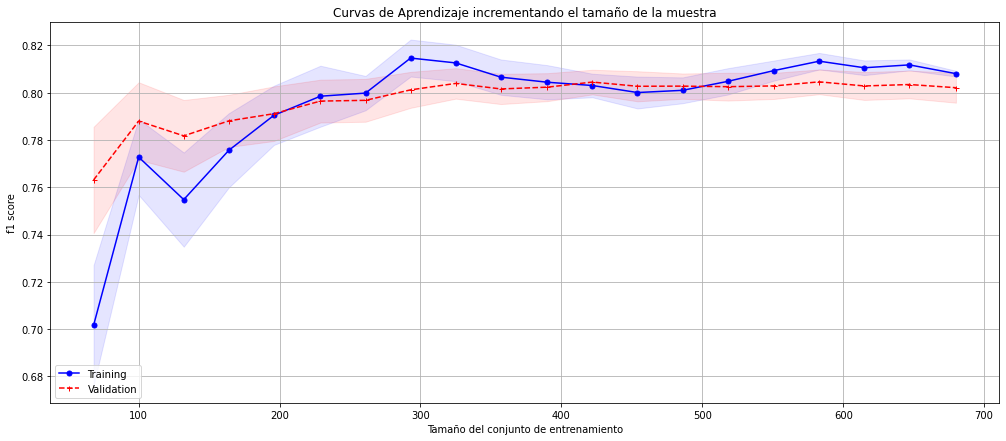

Para los datos de test
DT:
mean Accuracy: 0.669 (0.0332)
mean Recall: 0.755 (0.0310)
mean Gmean: 0.592 (0.0533)
mean Precision: 0.769 (0.0289)
mean Fscore: 0.779 (0.0071)

Para los datos de train
DT:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.824 (0.0000)
 


Curvas de aprendizaje del modelo: DecisionTreeClassifier()
Max_depth: 1



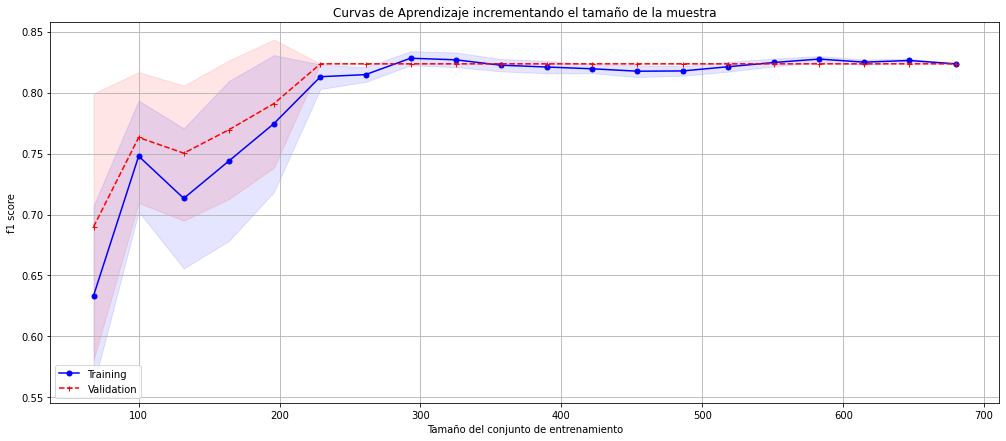

Max_depth: 2



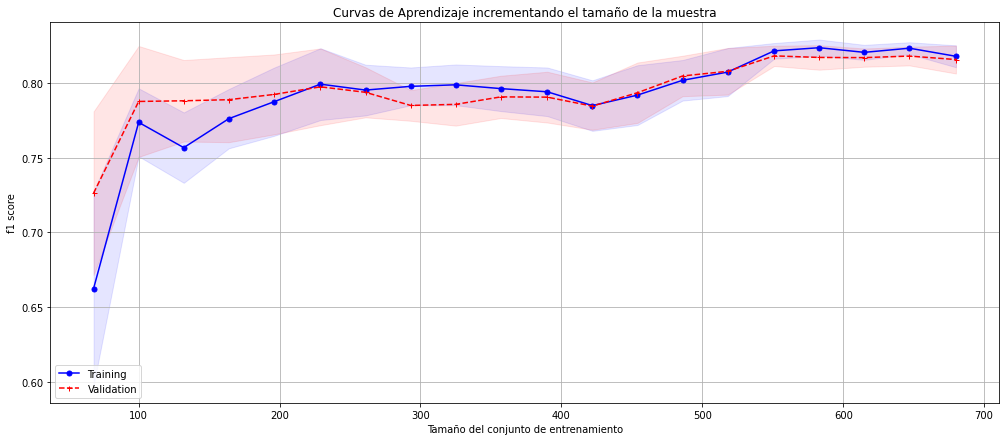

Max_depth: 3



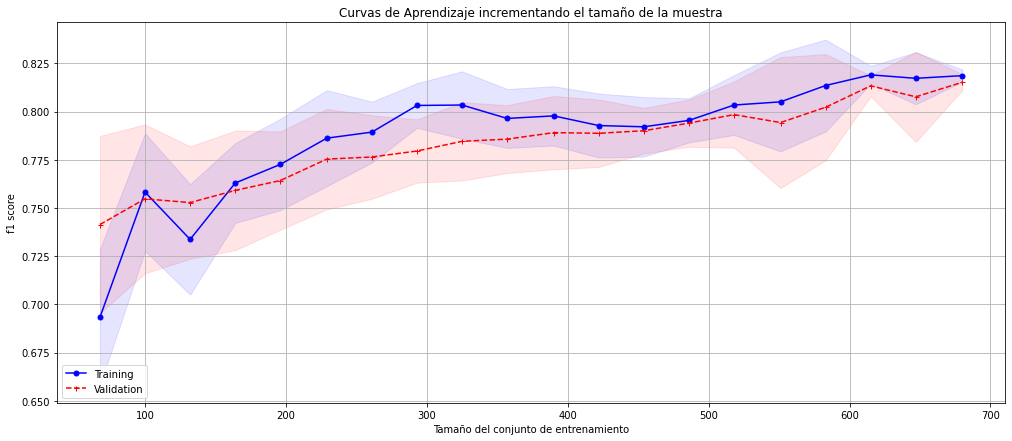

Max_depth: 4



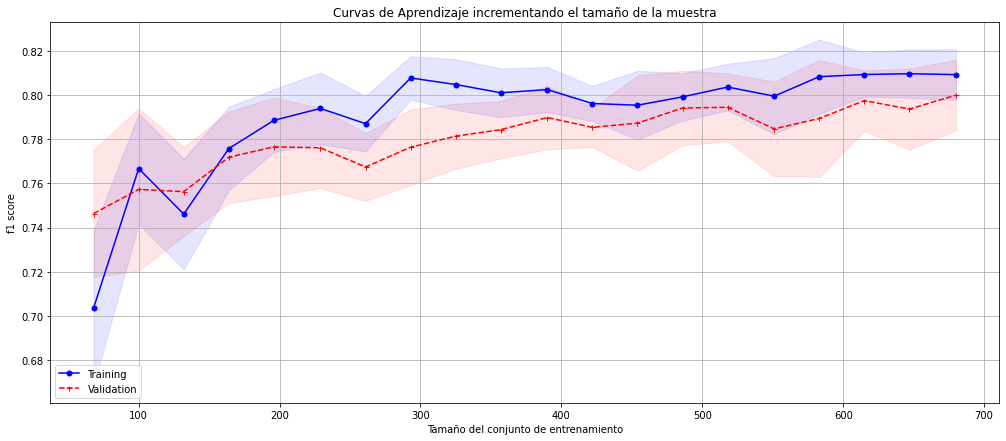

Max_depth: 5



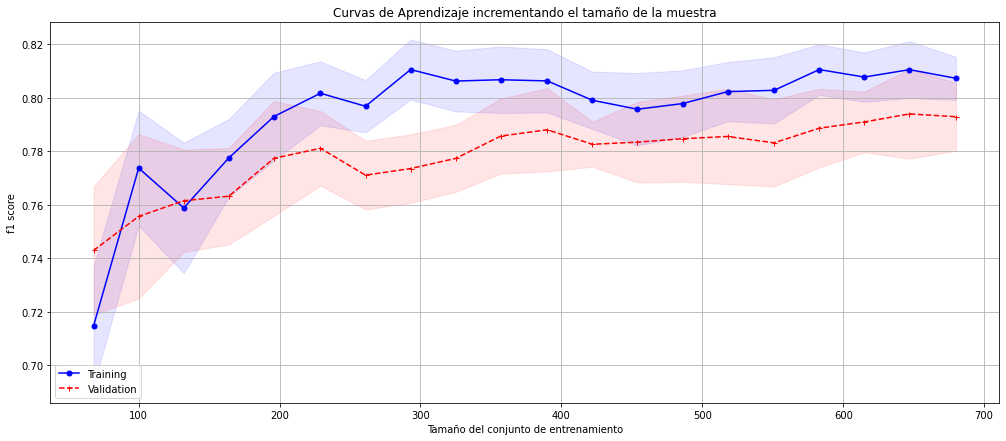

Max_depth: 6



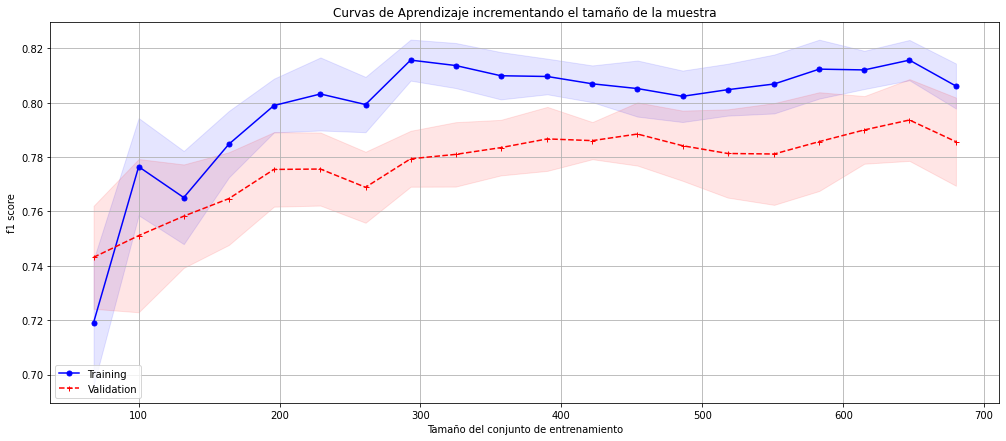

Max_depth: 7



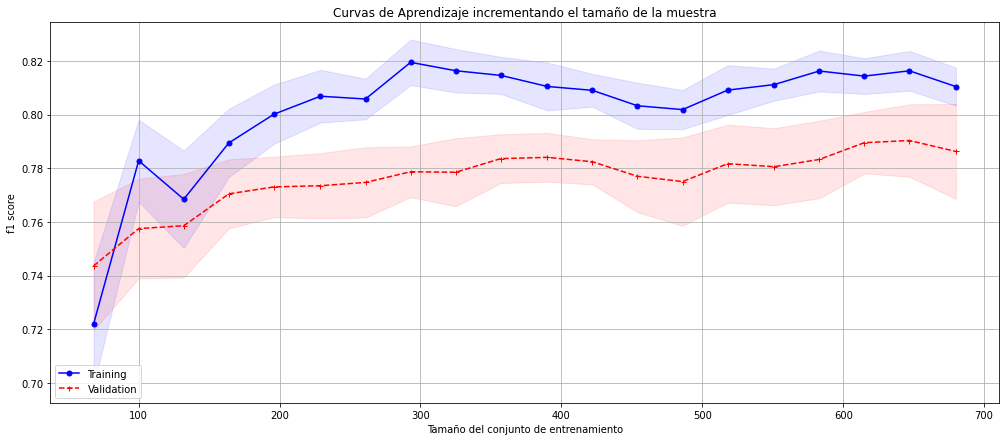

Max_depth: 8



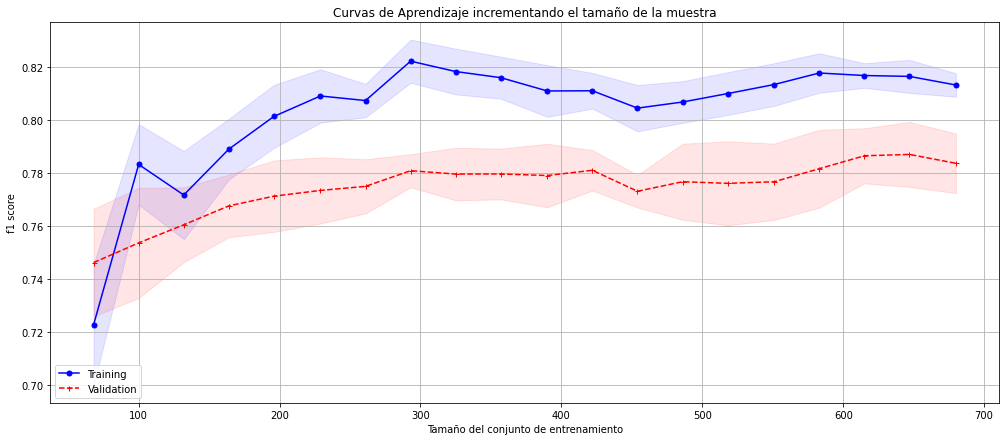

Max_depth: 9



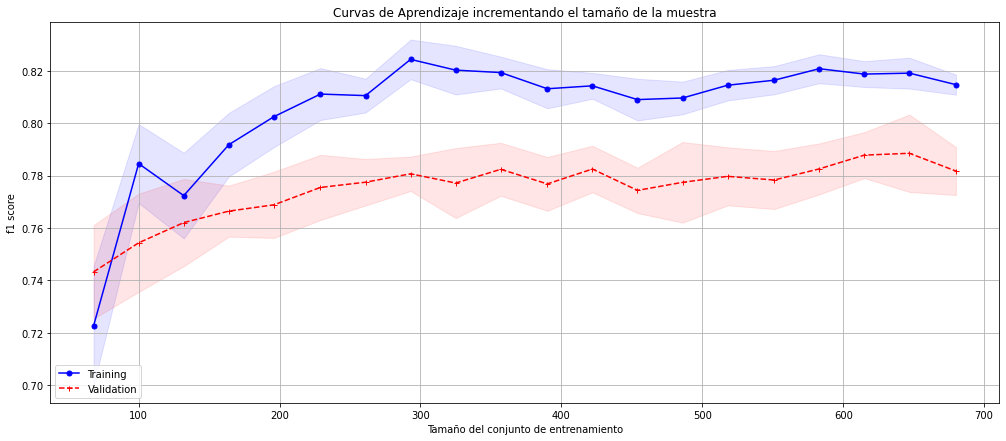

Max_depth: 10



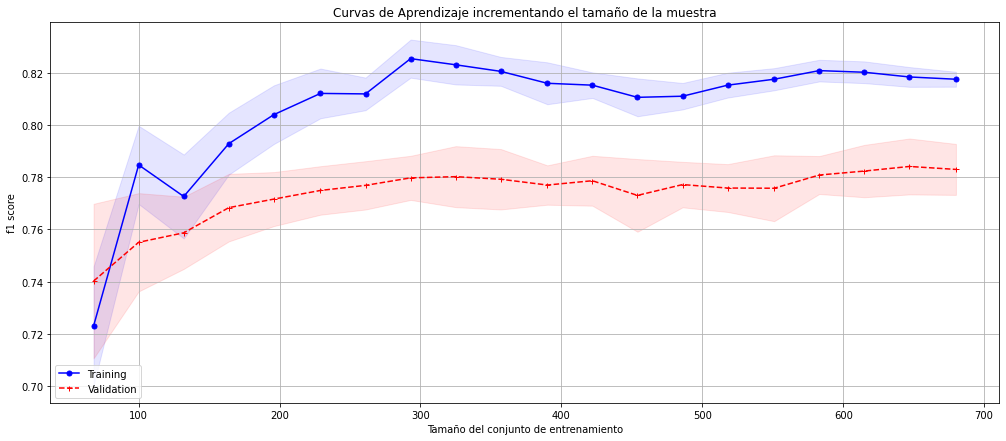

Max_depth: 11



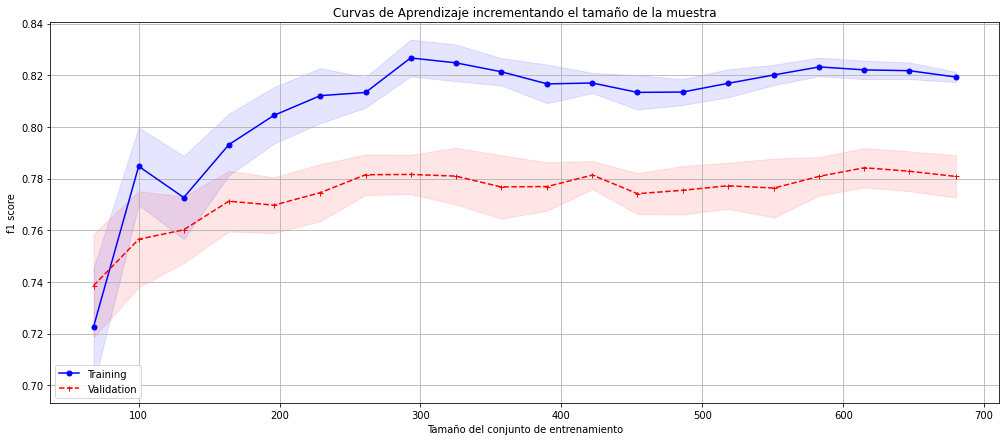

Max_depth: 12



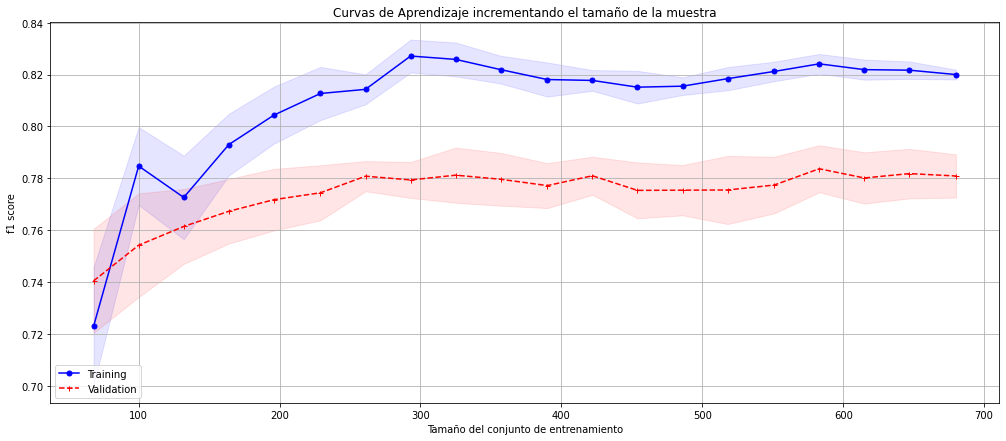

Max_depth: 13



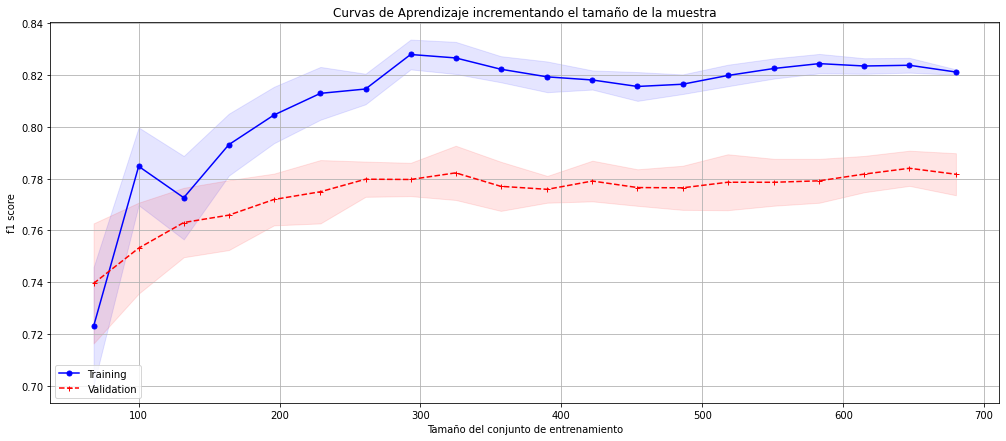

Max_depth: 14



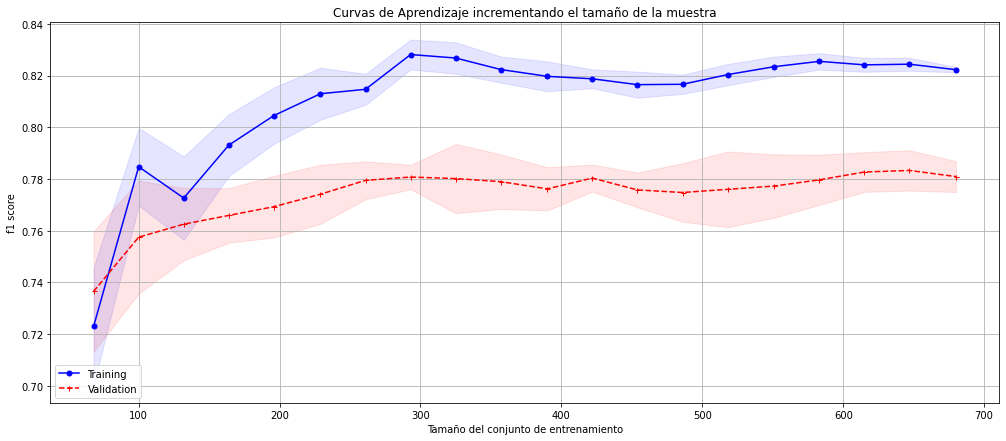

Max_depth: 15



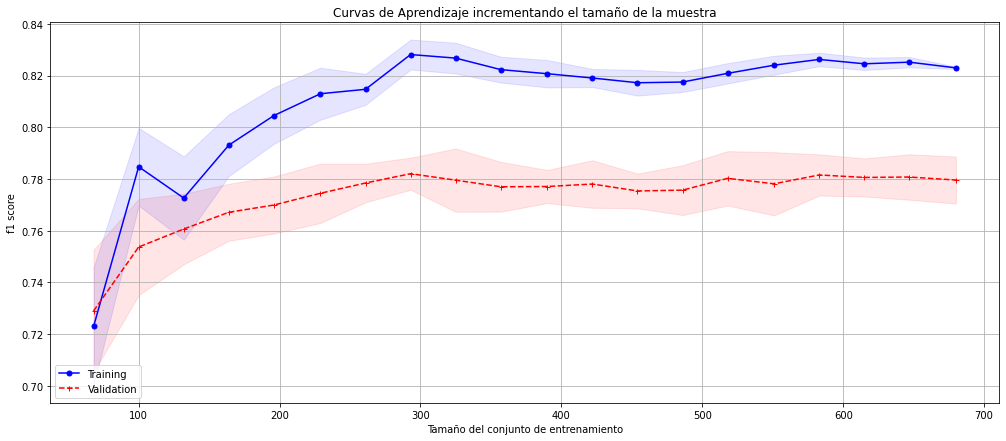

Max_depth: 16



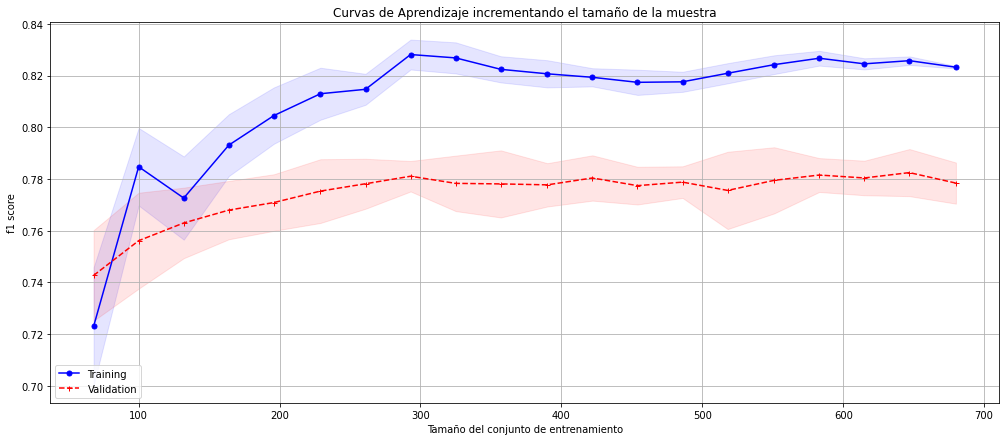

Max_depth: 17



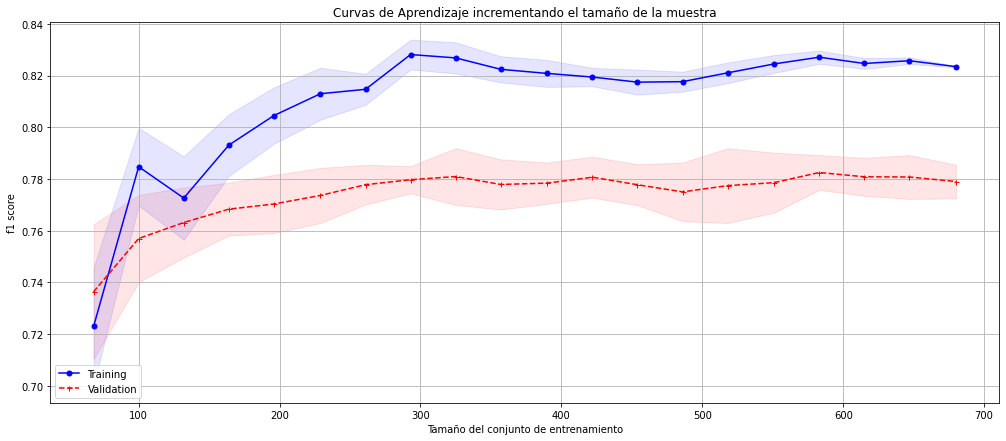

Max_depth: 18



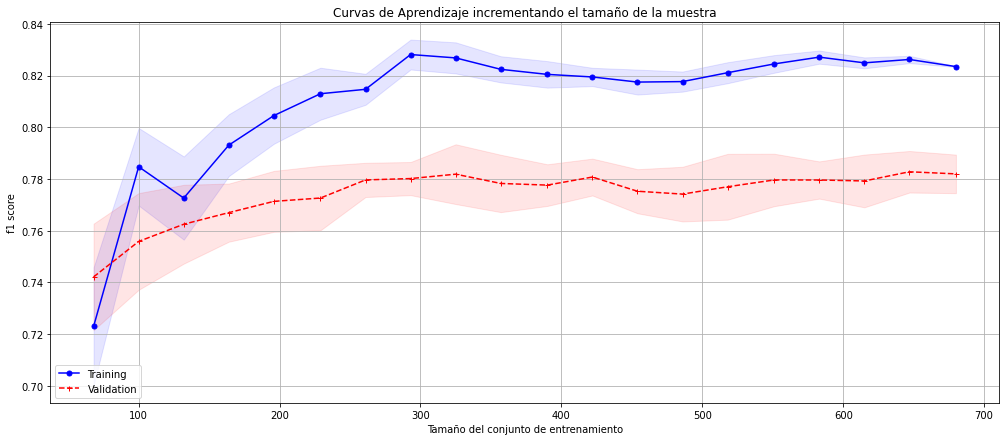

Max_depth: 19



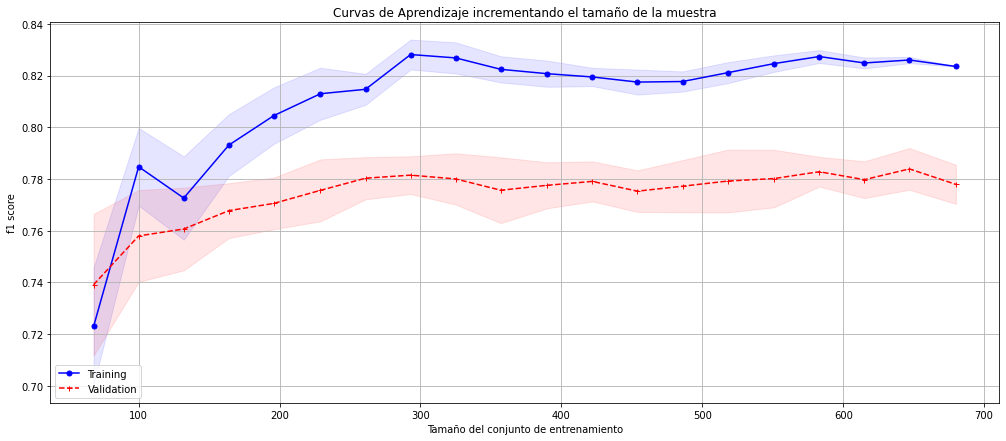

Max_depth: 20



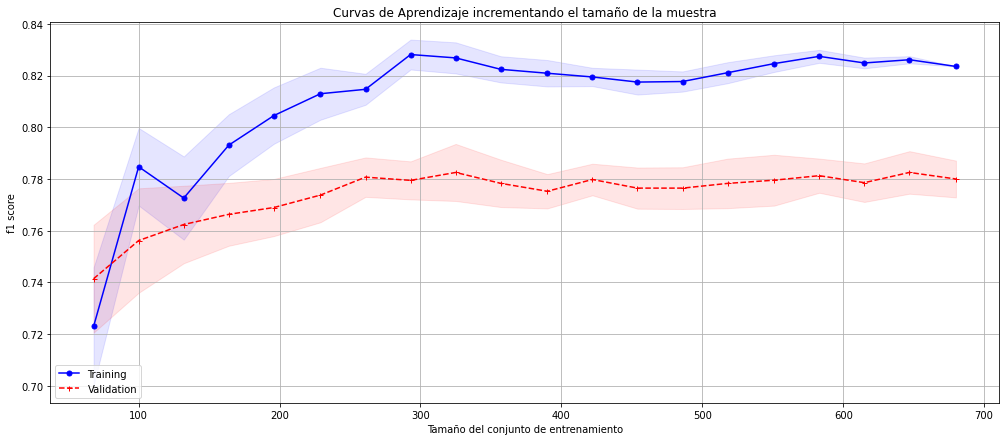

Para los datos de test
RFC:
mean Accuracy: 0.739 (0.0363)
mean Recall: 0.906 (0.0335)
mean Gmean: 0.561 (0.0497)
mean Precision: 0.764 (0.0198)
mean Fscore: 0.809 (0.0057)

Para los datos de train
RFC:
mean Accuracy: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean Gmean: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Fscore: 0.824 (0.0000)
 


Curvas de aprendizaje del modelo: RandomForestClassifier()


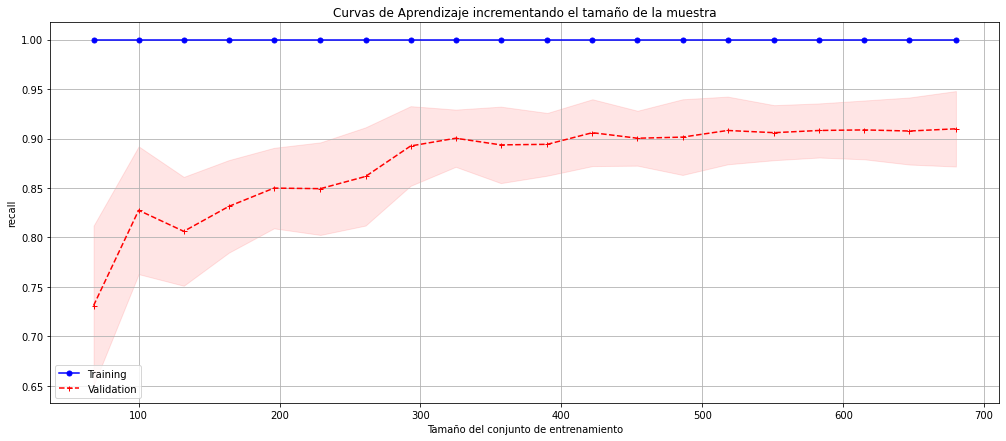

In [21]:
modelos, nombres = get_models()  # cargamos los modelos a comparar

prueba_alexis=list()

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])]) #a cada modelo se mete la info a cada uno de los modelos

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0) 
    

  mismetricas_ = {'accuracy':make_scorer(mi_accuracy), 'recall':make_scorer(mi_recall), 
                  'gmean':make_scorer(mi_gmean),'precision':make_scorer(mi_precision),
                  'fscore':make_scorer(mi_fscore) }
  
  resultadosOU = cross_validate(pipeline, 
                          Xtrain, np.ravel(Ytrain),
                          scoring=mismetricas_,
                          cv=cv,
                          return_train_score=True)
 
  prueba_alexis.append(resultadosOU)

  print("Para los datos de test")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']),
                                                                          np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_recall']),
                                                                          np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_gmean']),
                                                                          np.std(resultadosOU['test_gmean']),
                                                                          np.mean(resultadosOU['test_precision']),
                                                                          np.std(resultadosOU['test_precision']),
                                                                          np.mean(resultadosOU['test_fscore']),
                                                                          np.std(resultadosOU['test_fscore']) 
                                                                          ))
  print("Para los datos de train")
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean Gmean: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Fscore: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['train_accuracy']),
                                                                          np.std(resultadosOU['train_accuracy']), 
                                                                          np.mean(resultadosOU['train_recall']),
                                                                          np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_gmean']),
                                                                          np.std(resultadosOU['train_gmean']),
                                                                          np.mean(resultadosOU['train_precision']),
                                                                          np.std(resultadosOU['train_precision']),
                                                                          np.mean(resultadosOU['train_fscore']),
                                                                          np.std(resultadosOU['train_fscore']) 
                                                                          ),"\n\n")
  print('Curvas de aprendizaje del modelo:',modelos[i])
  mi_ModeloYCurvas(Xtrain,i)


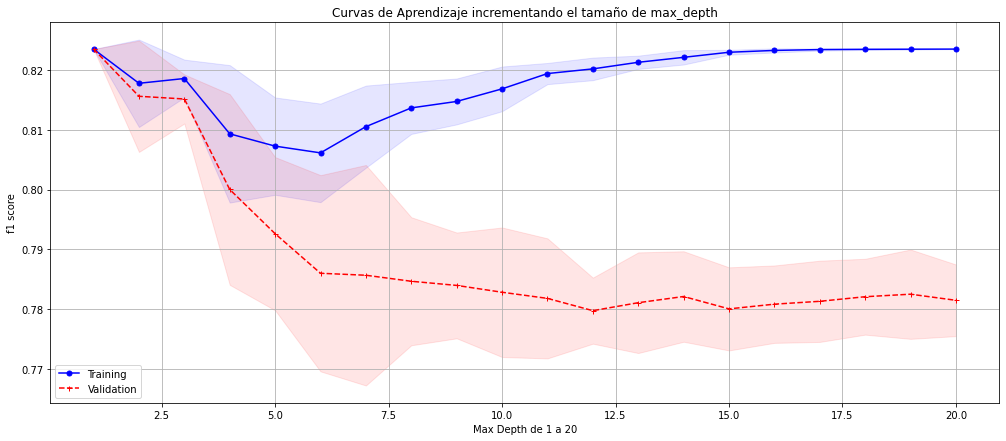

In [22]:
param_range, train_scores, test_scores = create_validation_curve(modelos[1], Xtrain, Ytrain, cv,
                                                                 'max_depth', make_scorer(mi_fscore))
mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=2) 

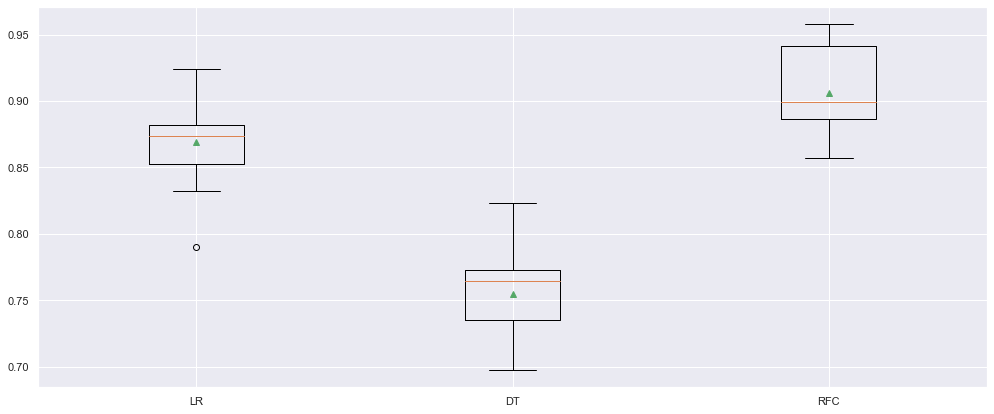

In [23]:

sns.set(rc={'figure.figsize':(17,7)})
bpGmean = list()
for i in range(len(prueba_alexis)):

  bpGmean.append(prueba_alexis[i]['test_recall'])

plt.boxplot(bpGmean, labels=nombres, showmeans=True)

plt.show()

#**Ejercicio-5.**

In [24]:
modelop = LogisticRegression(max_iter=10000, random_state=0)

pipeline = Pipeline(steps=[('cT',columnasTransformer),('m',modelop)])

dicc_grid = {'C':np.linspace(0.1,100,10),
             'solver':['newton-cg','lbfgs'],
             'class_weight':[None,'balanced'],
             'penalty':['l2']
                          }

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)

grid = GridSearchCV(estimator=modelop, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=make_scorer(mi_fscore))

Xcol = columnasTransformer.fit_transform(Xtrain)

grid.fit(Xcol, Ytrain)

print('Mejor valor de f1-score obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de f1-score obtenido con la mejor combinación: 0.8109561726684184
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'newton-cg'}
Métrica utilizada: make_scorer(mi_fscore)


In [25]:
def mi_ModeloYCurvasLRBest(Xin,valores_grid):
     # CAMBIAR VALORES A VALORES_GRID BEST SCORE
       modelo = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=valores_grid.best_params_.get('model__C'),
                            solver=valores_grid.best_params_.get('model__solver'),
                            class_weight=valores_grid.best_params_.get('model__class_weight'),

                            random_state=0)

       Xx = columnasTransformer.fit_transform(Xin)
       


       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

          
       delta_train_sz = np.linspace(0.1, 1.0, num=40)

       tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo,    
                                                        X = Xx,
                                                        y = Ytrain,
                                                        cv = mi_kfold,
                                                        train_sizes = delta_train_sz,
                                                        scoring = make_scorer(mi_fscore) ,
                                                        random_state=0)
       
       i=0 
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)
      

In [26]:
def do_grid_search(model, X, y, cv, dicc_grid, scoring):

    #Nuestro pipe, otra vez
    grid_pipe = Pipeline(steps = [
        ('Correlation', columnasTransformer),
        ('model', model)
        ])

    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv,
        param_grid=dicc_grid, scoring=scoring)

    #Le entramos los valores. Recuerda que el .ravel() es para evitar un warning
    grid.fit(X, y.values.ravel())

    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)
    
    return grid



In [27]:
def mi_grafica(modelos,Xin,y,i):
       modelo = modelos
       i=i 
       xcolumnas = columnasTransformer.fit(Xin)
       Xtransform = xcolumnas.transform(Xin)

       mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)



       delta_train_sz = np.linspace(0.1, 1.0, num=40)


       if(i==4):
          tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_precision),
                                                        random_state=0)
       else:
        
          if(i==6):
                    tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                        X = Xtransform,
                                                        y = Ytrain,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        scoring = make_scorer(mi_fscore),
                                                        random_state=0)
          else:  
            
              tr_sizes, tr_scores, val_scores = learning_curve(estimator = modelo ,
                                                            X = Xtransform,
                                                            y = Ytrain,
                                                            cv = mi_kfold ,
                                                            train_sizes = delta_train_sz ,
                                                            scoring = make_scorer(mi_recall),
                                                            random_state=0)


       # Obtenemos el gráfico con las curvas de aprendizaje:
       mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores,i)

In [28]:
Kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=0)

dicc_grid = {'model__C':np.linspace(70, 100, 2),
             'model__solver':['newton-cg','lbfgs','liblinear','sag','saga'],
             'model__class_weight':[None,'balanced'],
             'model__penalty':['l1','l2','elasticnet', None]
             }

LR_grid = do_grid_search(modelos[0], Xtrain, Ytrain, Kfold, dicc_grid, make_scorer(mi_fscore))

Mejor valor de exactitud obtenido con la mejor combinación: 0.7993256862680362
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 70.0, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_fscore)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
780 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.framework/

Curvas de aprendizaje del modelo LR Mejorado:


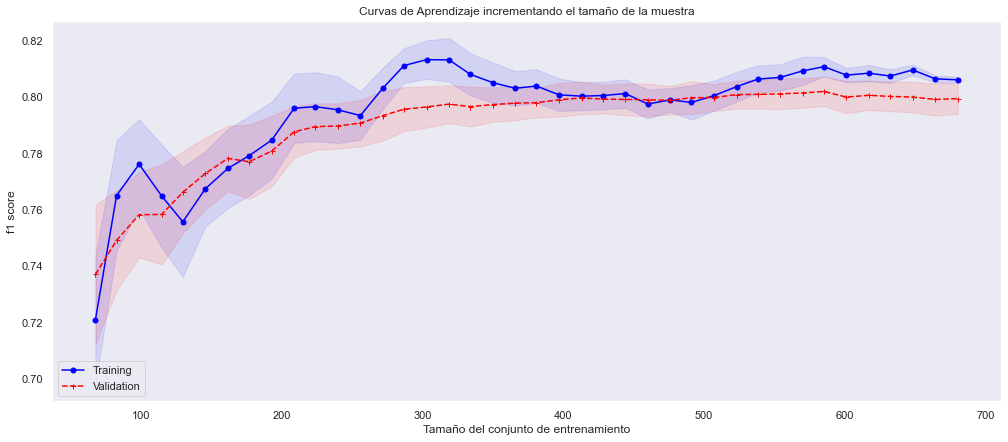

In [29]:
print('Curvas de aprendizaje del modelo LR Mejorado:')

mi_ModeloYCurvasLRBest(Xtrain,LR_grid)

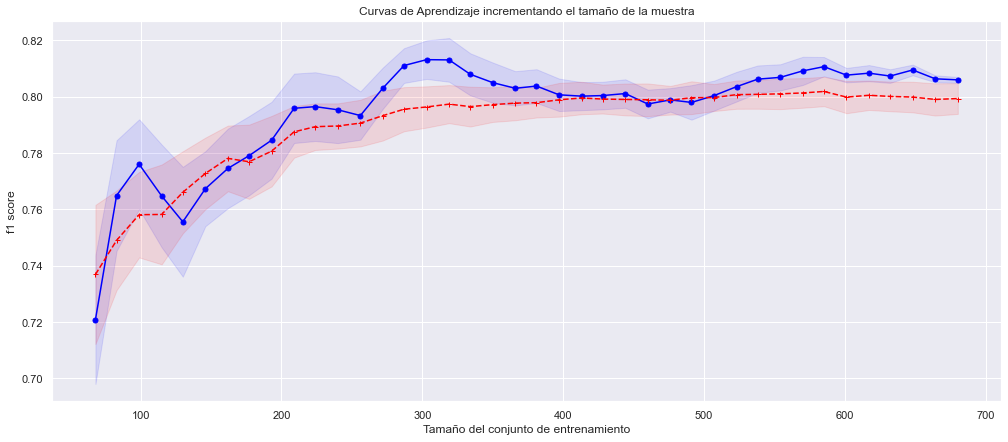

In [30]:
mi_grafica (LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=LR_grid.best_params_.get('model__C'),
                            solver=LR_grid.best_params_.get('model__solver'),
                            class_weight=LR_grid.best_params_.get('model__class_weight')),Xtrain,Ytrain,i=6)

In [31]:
dicc_grid = {'model__ccp_alpha':np.linspace(0.0001, 100, 2),
             'model__criterion':['gini', 'entropy', 'log_loss'],
             'model__max_depth':np.linspace(1, 1000, 20,dtype=int),
             'model__min_samples_split':np.linspace(0.000001, 100, 20),
             'model__class_weight':['balanced',None],
             }

DT_grid = do_grid_search(modelos[1], Xtrain, Ytrain, Kfold, dicc_grid, make_scorer(mi_precision))

Mejor valor de exactitud obtenido con la mejor combinación: 0.8807675677700925
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.0001, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 1e-06}
Métrica utilizada: make_scorer(mi_precision)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
68400 fits failed out of a total of 72000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3600 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Library/Frameworks/Python.frame

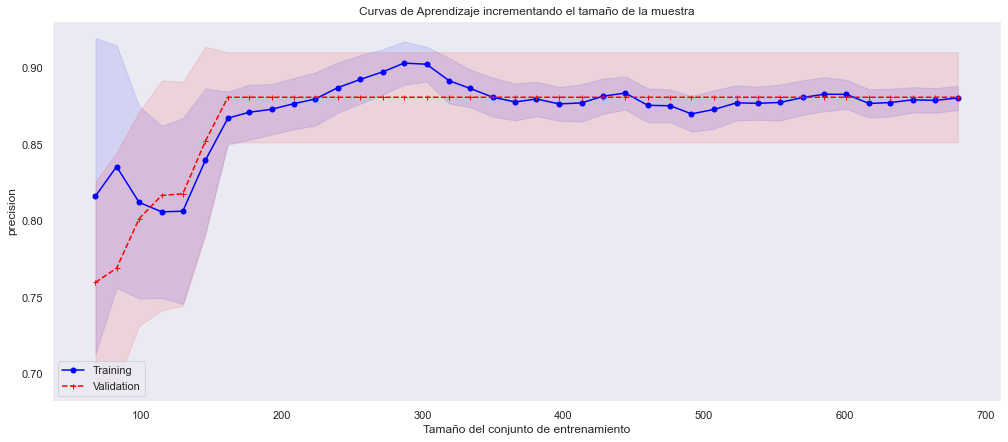

In [32]:

mi_grafica (DecisionTreeClassifier( ccp_alpha=DT_grid.best_params_.get('model__ccp_alpha'),
                            class_weight=DT_grid.best_params_.get('model__class_weight'),
                            criterion=DT_grid.best_params_.get('model__criterion'),
            max_depth=DT_grid.best_params_.get('model__max_depth'),
            min_samples_split=DT_grid.best_params_.get('model__min_samples_split')),Xtrain,Ytrain,i=4)

In [47]:
dicc_grid = {'model__ccp_alpha':np.linspace(0.00001, 1000, 2),
             'model__criterion':['gini', 'entropy', 'log_loss'],
             'model__max_depth':[np.linspace(1, 10, 10,dtype=int),None],
             'model__min_samples_split':np.linspace(1, 100, 10),
             'model__class_weight':['balanced','balanced_subsample',None],
             'model__n_estimators': [200,500]}

dicc_grid2 = {'model__ccp_alpha':[0.001],
             'model__criterion':['gini', 'entropy'],
             'model__max_depth':[12],
             'model__min_samples_split':[2],
             'model__class_weight':['balanced','balanced_subsample',None],
             'model__n_estimators': [200]}

RF_grid = do_grid_search(modelos[2], Xtrain, Ytrain, Kfold, dicc_grid2, 'recall')

Mejor valor de exactitud obtenido con la mejor combinación: 0.9254901960784315
Mejor combinación de valores encontrados de los hiperparámetros: {'model__ccp_alpha': 0.001, 'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 12, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Métrica utilizada: recall


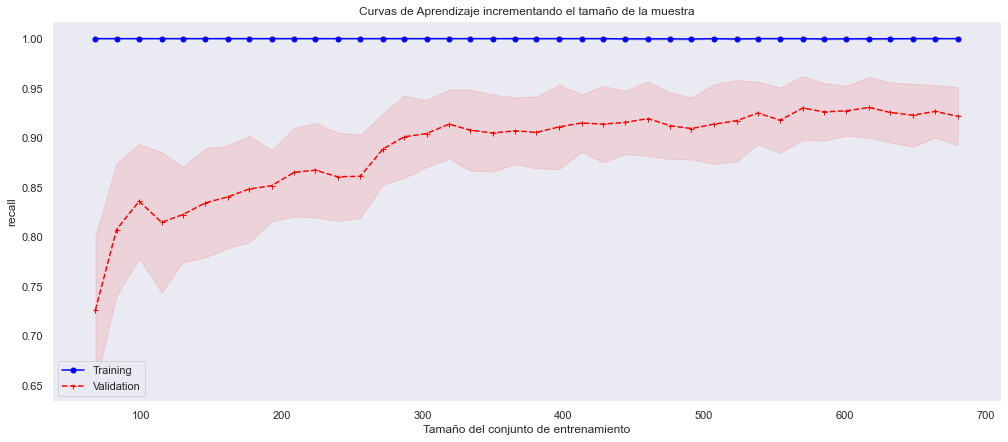

In [48]:

mi_grafica(RandomForestClassifier(ccp_alpha=RF_grid.best_params_.get('model__ccp_alpha'),
                            class_weight=RF_grid.best_params_.get('model__class_weight'),
                            criterion=RF_grid.best_params_.get('model__criterion'),
            max_depth=RF_grid.best_params_.get('model__max_depth'),
            min_samples_split=RF_grid.best_params_.get('model__min_samples_split'),),Xtrain,Ytrain,i=5)

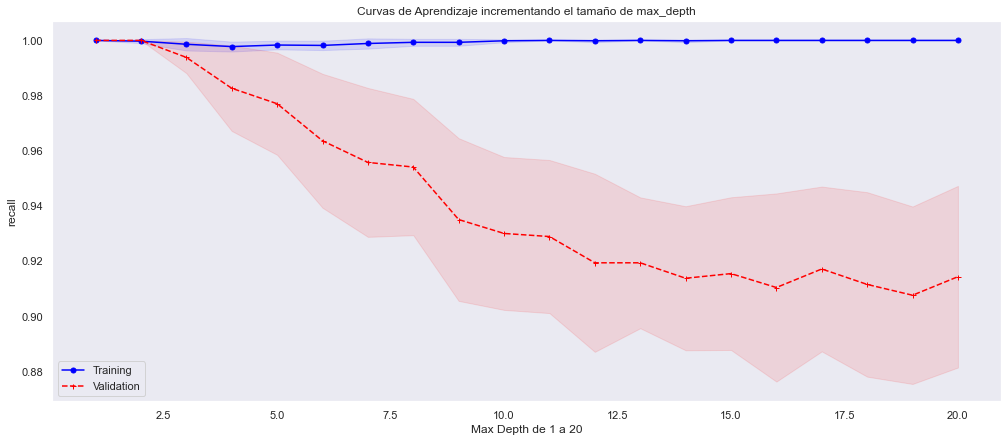

In [49]:
param_range, train_scores, test_scores = create_validation_curve(RandomForestClassifier(ccp_alpha=RF_grid.best_params_.get('model__ccp_alpha'),
                            class_weight=RF_grid.best_params_.get('model__class_weight'),
                            criterion=RF_grid.best_params_.get('model__criterion'),
            max_depth=RF_grid.best_params_.get('model__max_depth'),
            min_samples_split=RF_grid.best_params_.get('model__min_samples_split')), Xtrain, Ytrain, cv,
                                                                 'max_depth', make_scorer(mi_recall))
mi_ValidationCurvePlot(param_range, train_scores, test_scores,i=3) 

#**Ejercicio-6.**

In [51]:
modeloLR_Final = LogisticRegression(penalty='l2', 
                            max_iter=10000,
                            C=LR_grid.best_params_.get('model__C'),
                            solver=LR_grid.best_params_.get('model__solver'),
                            class_weight=LR_grid.best_params_.get('model__class_weight'),
                            random_state=0)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
modeloLR_Final.fit(Xxt, np.ravel(Ytrain))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print('Mejor valor de f1-score obtenido con la mejor combinación:', LR_grid.best_score_)
print("Mejor valor del modelo de Regresion Logistica:", modeloLR_Final.score(Xxtest, np.ravel(Ytest)))

Mejor valor de f1-score obtenido con la mejor combinación: 0.7993256862680362
Mejor valor del modelo de Regresion Logistica: 0.7733333333333333


In [52]:
modeloDT_Final = DecisionTreeClassifier(max_depth=DT_grid.best_params_.get('model__max_depth'),
                                    ccp_alpha=DT_grid.best_params_.get('model__ccp_alpha'),                               
                                    class_weight=DT_grid.best_params_.get('model__class_weight'),                                
                                    criterion=DT_grid.best_params_.get('model__criterion'),
                                    min_samples_split=DT_grid.best_params_.get('model__min_samples_split'),
                                    random_state = 0)


Xct = columnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
modeloDT_Final.fit(Xxt, np.ravel(Ytrain))

Xxtest = Xct.transform(Xtest)
print('Mejor valor de Precision obtenido con la mejor combinación:', DT_grid.best_score_)
print("Mejor valor del modelo del Arbol de Decision:", modeloDT_Final.score(Xxtest, np.ravel(Ytest)))

Mejor valor de Precision obtenido con la mejor combinación: 0.8807675677700925
Mejor valor del modelo del Arbol de Decision: 0.62


In [65]:
modeloRFC_Final = DecisionTreeClassifier(max_depth=RF_grid.best_params_.get('model__max_depth'),
                                    ccp_alpha=RF_grid.best_params_.get('model__ccp_alpha'),                               
                                    class_weight=RF_grid.best_params_.get('model__class_weight'),                                
                                    criterion=RF_grid.best_params_.get('model__criterion'),
                                    min_samples_split=RF_grid.best_params_.get('model__min_samples_split'),
                                    random_state = 0,
                                    max_features=20,
                                    max_leaf_nodes=20    )

Xct = columnasTransformer.fit(Xtrain)
Xxt = Xct.transform(Xtrain)
clf = modeloRFC_Final.fit(Xxt, np.ravel(Ytrain))

Xxtest = Xct.transform(Xtest)
print('Mejor valor de Recall obtenido con la mejor combinación:', RF_grid.best_score_)
print("Mejor valor del modelo del Bosque Aleatorio:", modeloRFC_Final.score(Xxtest, np.ravel(Ytest)))

# BORRAR DESDE AQUI
print('Exactitud en el conjunto de entrenamiento: %.2f' % clf.score(Xxt, Ytrain))

# Así, el conjunto con el que nos interesa evaluar el desempeño es con los de validación,
# así que calculamos primero sus predicciones y después las usamos para evaluar el modelo:

predi = clf.predict(Xxt)     # Obtenemos predicciones de 0s, 1s o 2s para cada clase

print('Exactitud en el conjunto de validación: %.2f' % clf.score(Xxt, Ytrain))

Mejor valor de Recall obtenido con la mejor combinación: 0.9254901960784315
Mejor valor del modelo del Bosque Aleatorio: 0.6933333333333334
Exactitud en el conjunto de entrenamiento: 0.78
Exactitud en el conjunto de validación: 0.78


In [54]:
list(pd.DataFrame(Xtrain).columns.values)
clf

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=12,
                       max_features=20, random_state=0)

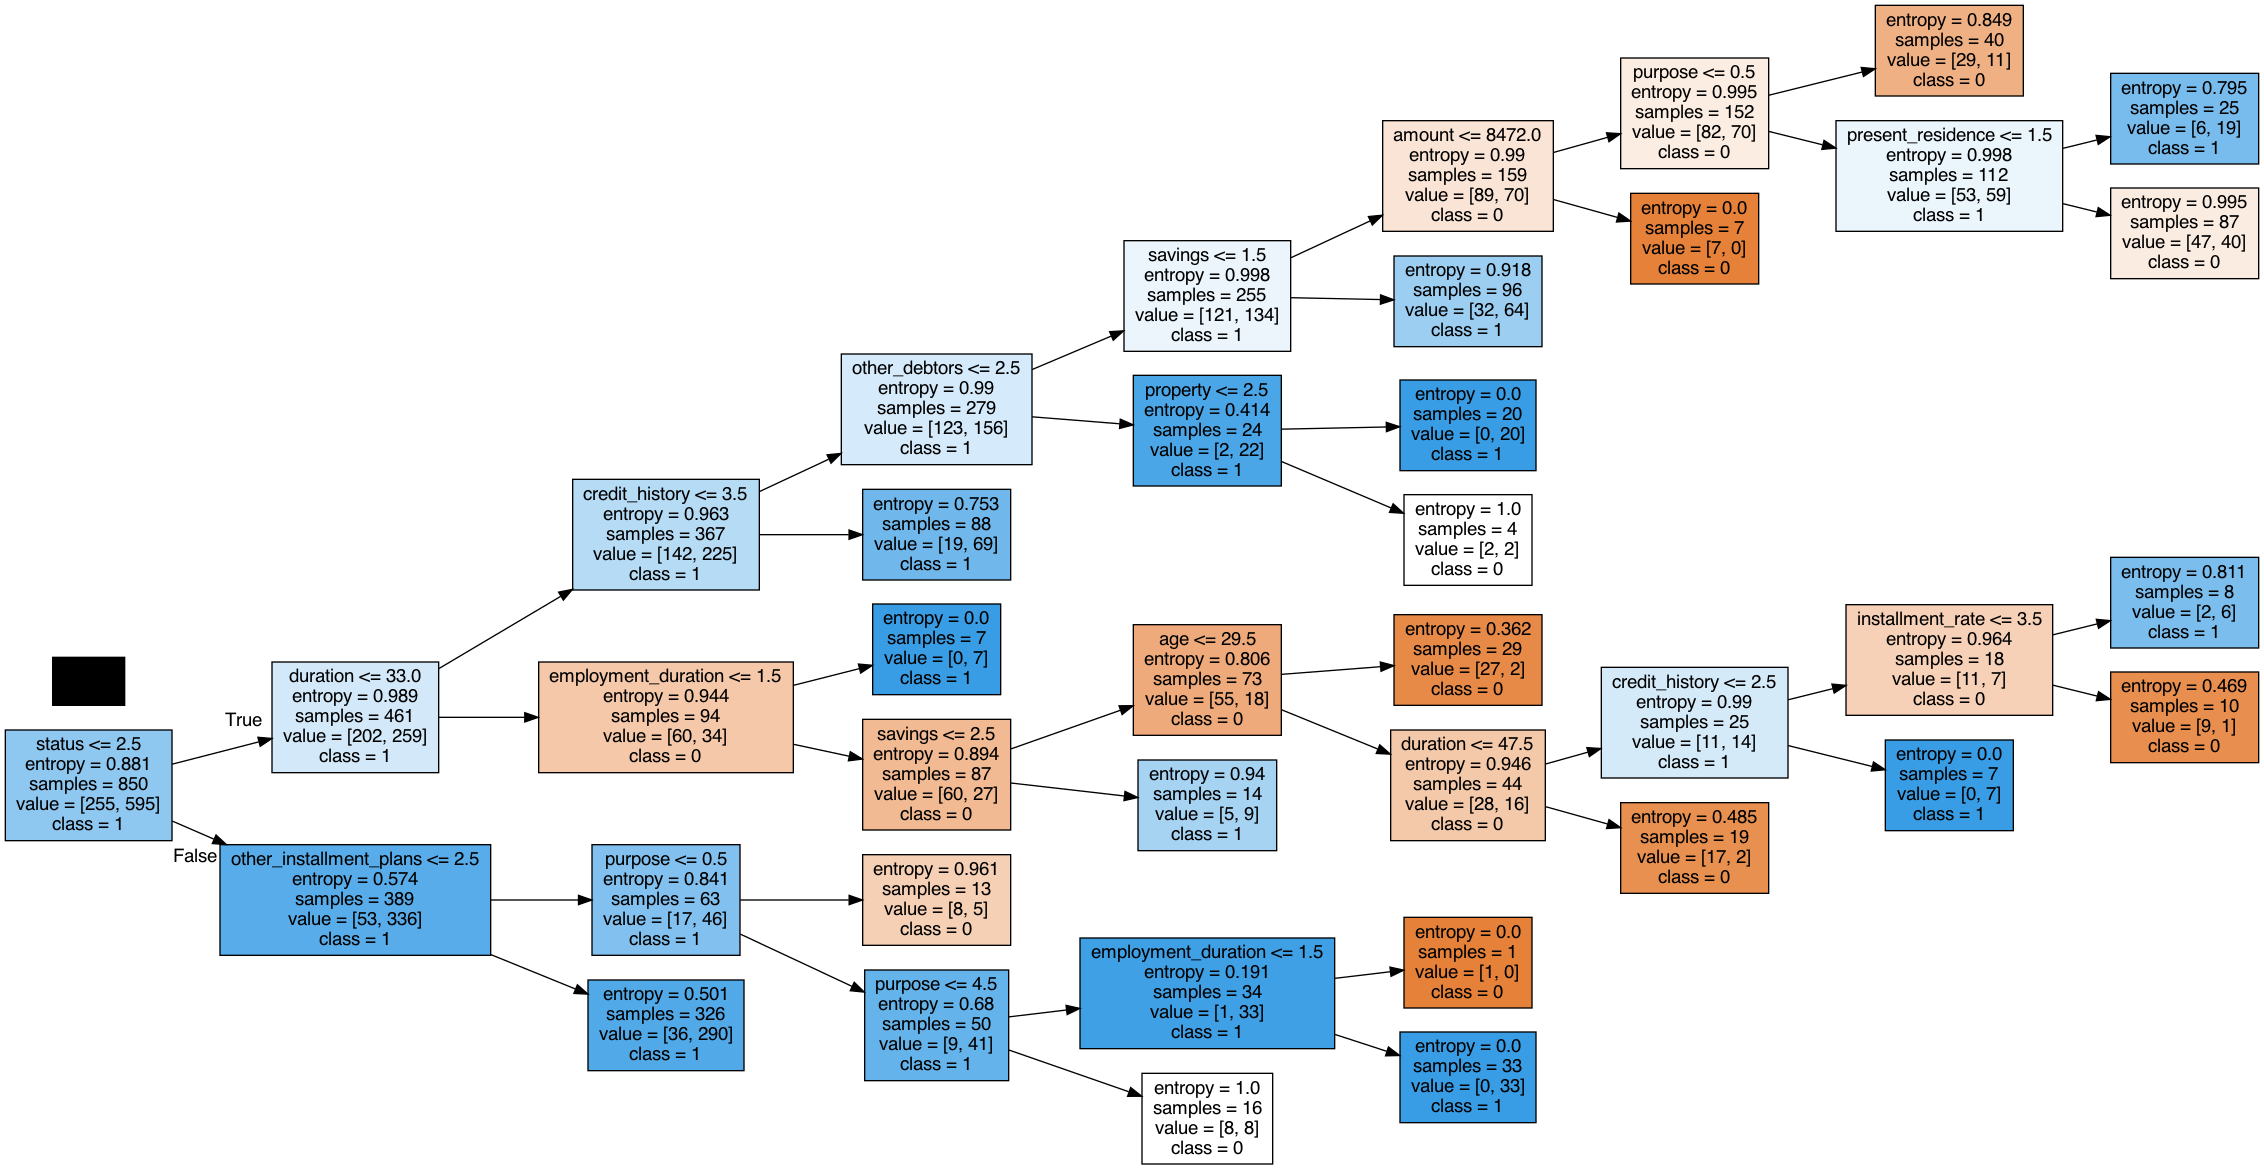

In [66]:
clfa = modeloRFC_Final.fit(Xtrain, np.ravel(Ytrain))
dot_data = tree.export_graphviz(decision_tree=clfa, 
                                out_file=None,
                                max_depth=None,
                                feature_names=['status',
                                             'duration',
                                             'credit_history',
                                             'purpose',
                                             'amount',
                                             'savings',
                                             'employment_duration',
                                             'installment_rate',
                                             'personal_status_sex',
                                             'other_debtors',
                                             'present_residence',
                                             'property',
                                             'age',
                                             'other_installment_plans',
                                             'housing',
                                             'number_credits',
                                             'job',
                                             'people_liable',
                                             'telephone',
                                             'foreign_worker'],
                                class_names=['0','1'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###**Fin de la Actividad de la semana 6.**